### Name = Devindi De Silva
### Index Number = 190128H

(-5.499999999999998, 5.499999999999963, -5.499999999999998, 5.499999999999963)

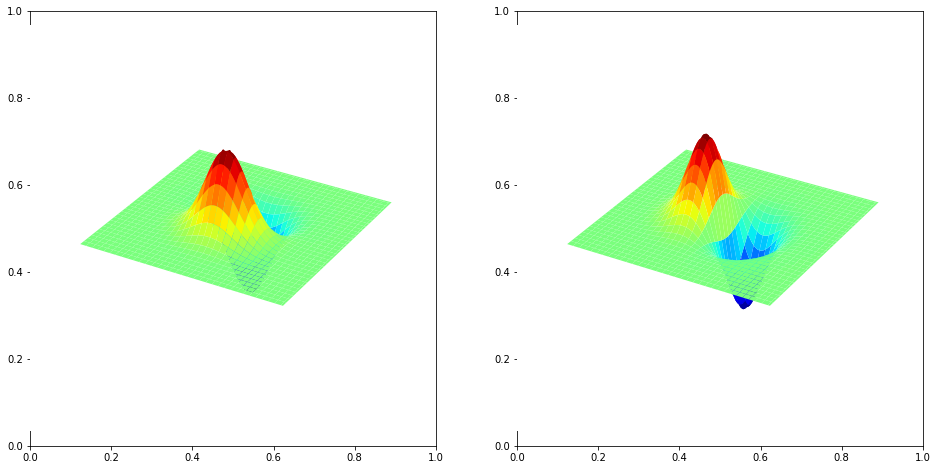

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


fig,ax = plt.subplots(1,2, figsize=(16,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
sigma=1

delta =0.1
X,Y = np.meshgrid(np.arange(-5,5+delta,delta),np.arange(-5,5+delta,delta))
z=np.exp(-(X**2+Y**2)/(2*sigma**2))
z/= np.sum(z)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
Zx = cv.filter2D(z,-1,sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
Zy = cv.filter2D(z,-1,sobel_h)


surf1= ax1.plot_surface(X,Y,Zx, cmap=cm.jet, linewidth=0, antialiased=True)
surf2= ax2.plot_surface(X,Y,Zy, cmap=cm.jet, linewidth=0, antialiased=True)

ax1.axis('off')
ax2.axis('off')


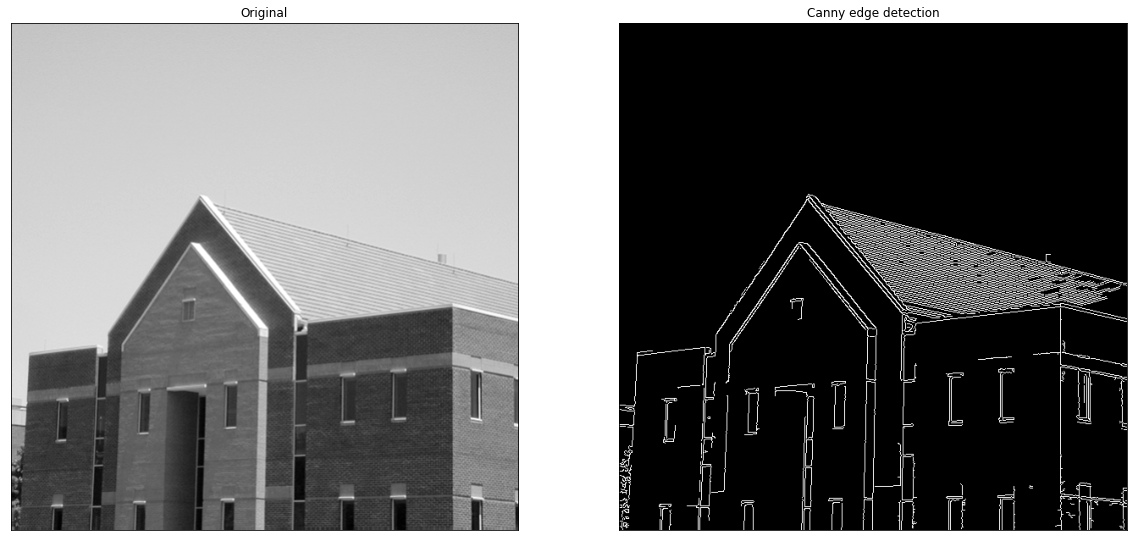

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread(r'building.tif',cv.IMREAD_GRAYSCALE)
assert im is not None

edges = cv.Canny(im,100,200)

fig,ax=plt.subplots(1,2,figsize = (20,20))
ax[0].imshow(im, cmap = 'gray')
ax[0].set_title("Original")
ax[1].imshow(edges, cmap='gray')
ax[1].set_title("Canny edge detection")
for i in range(2):
    ax [i] . set_xticks ([]) , ax [i] . set_yticks ([])


(-0.5, 599.5, 599.5, -0.5)

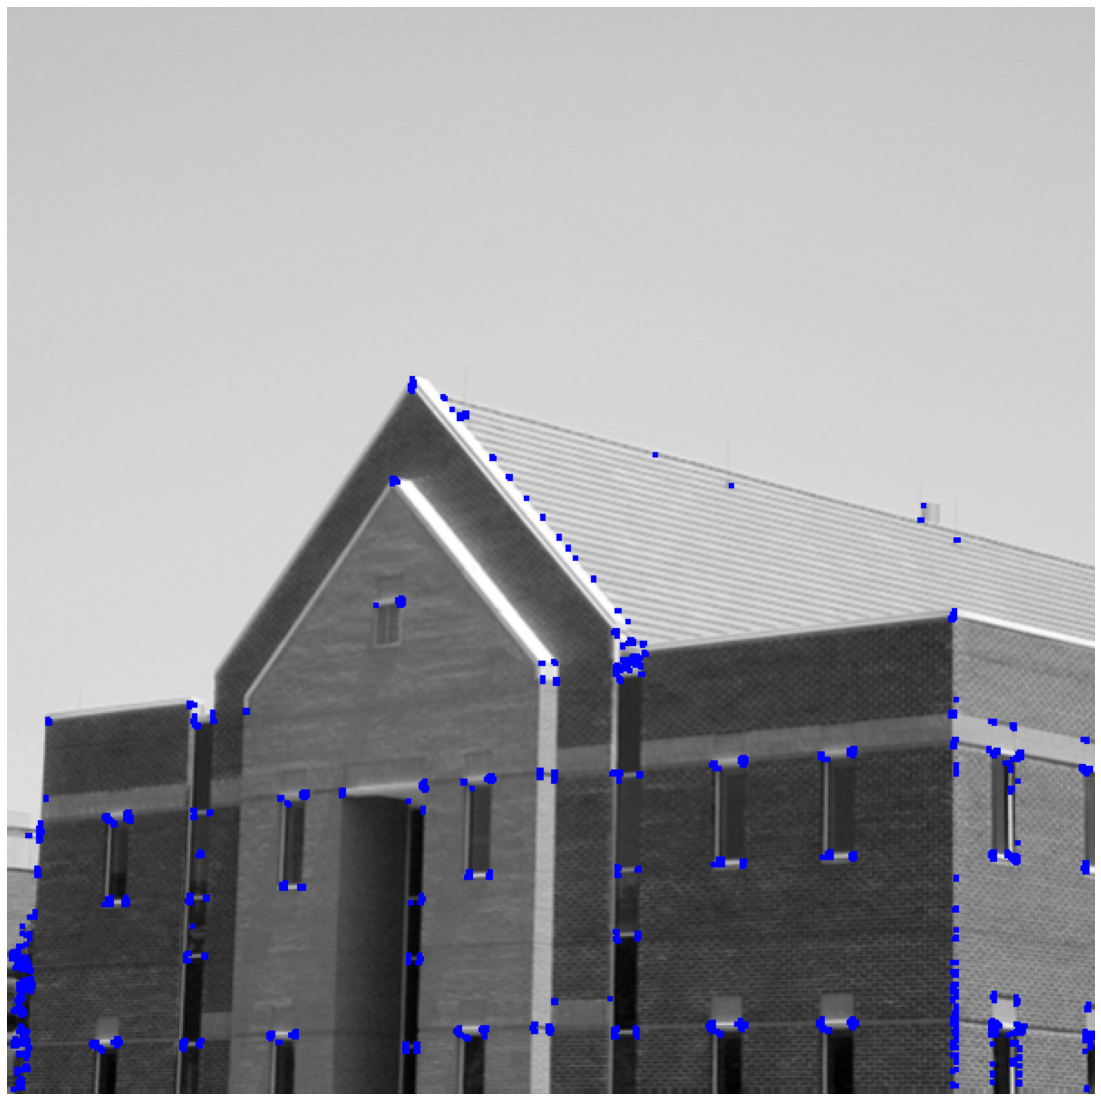

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread(r'building.tif',cv.IMREAD_COLOR)
assert im is not None

gray  = cv. cvtColor(im, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

dst = cv.dilate(dst, None)
im[dst>0.01*dst.max()]=[0,0,255]

fig,ax=plt.subplots(figsize = (20,20))
plt .imshow(im, cmap = 'gray')
plt.axis('off')



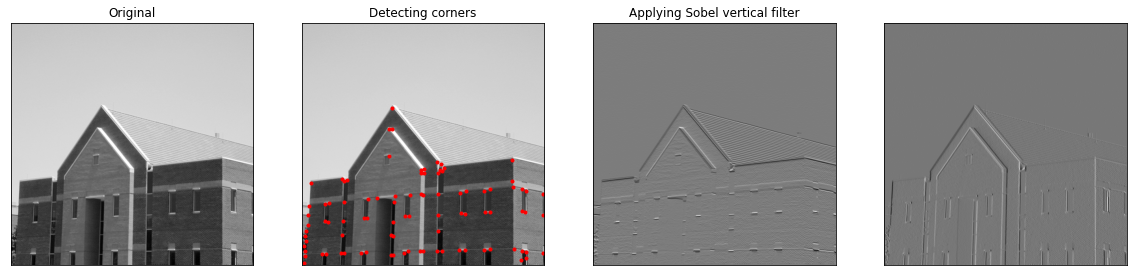

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

im = cv.imread(r'building.tif',cv.IMREAD_COLOR)
assert im is not None
fig, ax =plt.subplots(1,4, figsize=(20,20))
ax[0].imshow(im, cmap='gray')
ax[0].set_title("Original")
I  = cv. cvtColor(im, cv.COLOR_BGR2GRAY)
I = np.float32(I)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)

Ix = cv.filter2D(I,-1, sobel_v)
Iy = cv.filter2D(I,-1,sobel_h)

sigma=3
ksize=7
m11 = cv.GaussianBlur(Ix*Ix,(ksize,ksize),sigma)
m12=cv.GaussianBlur(Ix*Iy,(ksize,ksize),sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy,(ksize,ksize),sigma)

det = m11*m22 - m12*m21
trace = m11+m22
alpha = 0.04
R = det - alpha*trace**2
R[R<1e8] = 0
cordinates = peak_local_max(R, min_distance = 2)


ax[1].imshow(im, cmap='gray')
ax[1].plot(cordinates[:,1],cordinates[:,0],'r.')
ax[1].set_title("Detecting corners")
ax[2].imshow(Ix+127, cmap='gray')
ax[2].set_title("Applying Sobel horizontal filter")
ax[3].imshow(Iy+127,cmap='gray')
ax[2].set_title("Applying Sobel vertical filter")

for i in range(4):
    ax [i] . set_xticks ([]) , ax [i] . set_yticks ([])
